# Mushroom Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Uploading and Examination of the file 

In [2]:
mushroom= pd.read_csv(r"C:\Users\Harshitha\Desktop\Important 2021\Data Trained\mushroom.csv")

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Shows the first 5 rows of the dataset

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Shows the summary od the DataFrame- index dtype, column dtype, non-null values and the memory usage

In [5]:
mushroom["class"].unique()

array(['p', 'e'], dtype=object)

Shows the unique values in a column

In [6]:
print("Dataset shape:",mushroom.shape)

Dataset shape: (8124, 23)


Shows number of rows and columns in the dataset

In [7]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Shows the count of unique values

### Data Visualization

Text(0.5, 1.0, 'Number of mushrooms')

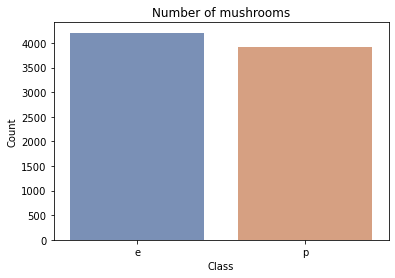

In [8]:
count = mushroom['class'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(count.index,count.values,alpha=0.8,palette="deep")
plt.ylabel('Count',fontsize=10)
plt.xlabel('Class',fontsize=10)
plt.title('Number of mushrooms')

Bar plot to count edible and poisonous mushrooms 

### Data Manipulation

In [9]:
labelencoder=LabelEncoder()
for column in mushroom.columns:
    mushroom[column]=labelencoder.fit_transform(mushroom[column])

In [10]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here all column values are converted to ordinal and there are no categorical values left

In [11]:
mushroom['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [12]:
mushroom = mushroom.drop(["veil-type"],axis=1)

Dropped Veil type because it wasn't contributing to the dataset since it's values are 0

### Correlation between the variables 

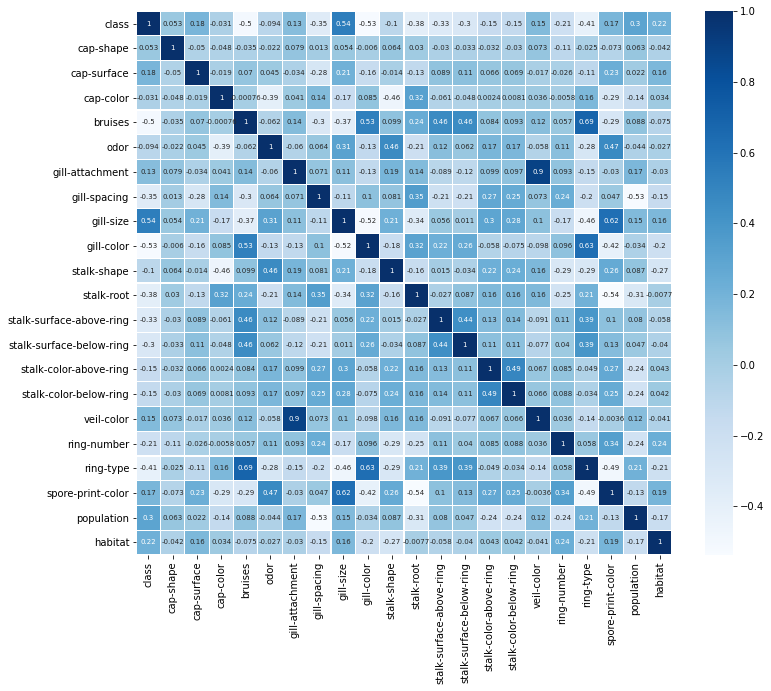

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(mushroom.corr(),linewidths=.1,cmap="Blues",annot=True,annot_kws={"size":7})
plt.yticks(rotation=0);

### Data Preparation

In [14]:
from sklearn.model_selection import train_test_split
x = mushroom.drop("class",axis=1)
y = mushroom["class"].values
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.1)

In [16]:
y.shape

(8124,)

In [17]:
x.shape

(8124, 21)

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.22,random_state=42)

### Classification Methods

In [20]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
print("Logistic Regression:\n\n",classification_report(y_test,pred_lg))
print("Test Accuracy:",accuracy_score(y_test,pred_lg))
print("Accuacy_score:",accuracy_score(y_test,pred_lg))


Logistic Regression:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       929
           1       0.94      0.95      0.95       859

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788

Test Accuracy: 0.947986577181208
Accuacy_score: 0.947986577181208


In [21]:
scr = cross_val_score(lg, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean())

Cross Validation score of Logistic Regression:  0.8403339901477832


In [22]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Multinomial Naive Bayes: \n\n",classification_report(y_test,predmnb))
print("Test Accuracy:",accuracy_score(y_test,predmnb))

Multinomial Naive Bayes: 

               precision    recall  f1-score   support

           0       0.75      0.94      0.83       929
           1       0.91      0.67      0.77       859

    accuracy                           0.81      1788
   macro avg       0.83      0.80      0.80      1788
weighted avg       0.83      0.81      0.80      1788

Test Accuracy: 0.8070469798657718


In [23]:
scr = cross_val_score(mnb, x, y, cv=5)
print("Cross Validation score of Multinomial Naive Bayes: ",scr.mean())

Cross Validation score of Multinomial Naive Bayes:  0.7267300492610838


In [24]:
svm = SVC()   
svm.fit(x_train,y_train)
svm.score(x_train,y_train)
predsvm=svm.predict(x_test)
print("Support Vector Machine: \n\n",classification_report(y_test,predsvm))
print("Test Accuracy:",accuracy_score(y_test,predsvm))

Support Vector Machine: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       929
           1       1.00      0.99      0.99       859

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788

Test Accuracy: 0.9927293064876958


In [25]:
scr = cross_val_score(svm, x, y, cv=5)
print("Cross Validation score of Support Vector Machine: ",scr.mean())

Cross Validation score of Support Vector Machine:  0.8420306934444864


In [26]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)
print("K Nearest Neighbour:\n\n",classification_report(y_test,pred_knn))
print("Test accuracy:",accuracy_score(y_test,pred_knn))

K Nearest Neighbour:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       929
           1       0.99      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

Test accuracy: 0.9960850111856824


In [27]:
scr = cross_val_score(knn, x, y, cv=5)
print("Cross Validation score of K Nearest Neighbour: ",scr.mean())

Cross Validation score of K Nearest Neighbour:  0.8815549071618036


In [28]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,pred_dt))
print("Test Accuracy:",accuracy_score(y_test,pred_dt))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

Test Accuracy: 1.0


In [29]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of Decision Tree: ",scr.mean())

Cross Validation score of Decision Tree:  0.9128227358848049


In [30]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Random Forest Classifier: \n\n",classification_report(y_test,pred_rf))
print("Test Accuracy:",accuracy_score(y_test,pred_rf))

Random Forest Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

Test Accuracy: 1.0


In [31]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of Random Forest: ",scr.mean())

Cross Validation score of Random Forest:  0.894231299734748


Therefore, we can conclude that Decision Tree is the best model to use because the difference between Cross Validaton and Accuracy is minimum compared to the rest

### Hyper-parameter Tuning of the Model

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
import numpy as np
parameters = {'max_depth': np.arange(2,15),
             'criterion': ['gini','entropy']}

In [34]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [35]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [36]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [37]:
mod = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=137)

mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


### Save the Model


In [38]:
import joblib
joblib.dump(mod,'mushrooms_model.csv')

['mushrooms_model.csv']

In [39]:
mod_from_joblib=joblib.load('mushrooms_model.csv')
mod_from_joblib.predict(x_test)

array([0, 1, 1, ..., 1, 1, 0])